## Aprendiendo como Clasificar con Ejemplos Real-world

Puede una maquina distinguir entre especies de flores basado en imagenes? Desde la perspectiva del machine learning, abordamos este problema haciendo que la maquina aprenda a realizar esta tarea basandose en ejemplos de cada especie para poder clasificar las imagenes donde las especies no estan marcadas.

Este proceso es llamado **clasificacion** (o aprendizaje no supervisado), y este problema se remonta a muchas decadas atras.

#### Iris Dataset

El dataset iris es un dataset clasico desde los anos 1930's; este es uno de los primeros ejemplos de clasificacion estadistica.

Antes que se identificara que el ADN lleva informacion genetica, las  multiples especies de las flores Iris eran identificadas por su morfologia.

Los siguientes 4 atributos de cada planta fueron medidos:
- Logitud Sepalo
- Ancho Sepalo
- Longitud Petalo
- Ancho Petalo

En general, podemos llamar a cualquier medicion desde nuestra como **feature** (caracteristica).

La pregunta seria, si agregamos una nuevo flor, podríamos hacer una buena predicción sobre su especie a partir de sus mediciones

Este es un problema de **Clasificacion**; dados ejemplos etiquetados, podemos disenar una regla que eventualmente va a ser aplicada a otro ejemplos. Esta es la misma configuracion que se usa para clasificar spam.

#### Primer paso: Visualizacion

Ya que el dataset es muy pequeno, podemos plotearlo facilmente todos los puntos y todas las proyecciones bi-dimensionales en una pagina. 

Vamos a construir intuiciones que luego se pueden extender a conjunto de datos con muchas mas dimensiones y data points.

Cada subploteo en el siguiente screenshot muestra todos los puntos proyectados en dos de las dimensiones. 

Los grupos etiquetas son:
- Plantas Iris **Setosa** (triangulos)
- Plantas Iris **Versicolor** (circulo)
- Plantas Iris **Virginica** (equis)

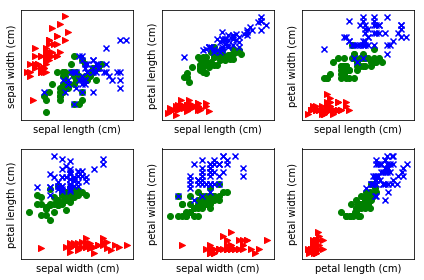

In [15]:
from matplotlib import pyplot as plt

# sklearn proporciona el dataset iris
from sklearn.datasets import load_iris

# load_iris retorna un objeto con varias filas
data = load_iris()
features = data.data
feature_names = data.feature_names
target = data.target
target_names = data.target_names

fig,axes = plt.subplots(2, 3)
pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

# 0 : sepal length
# 1 : sepal width
# 2 : petal length
# 3 : petal width

# Seteamos 3 tipos de pares (color, marker)
color_markers = [
        ('r', '>'),
        ('g', 'o'),
        ('b', 'x'),
        ]

for i, (p0, p1) in enumerate(pairs):
    ax = axes.flat[i]

    for t in range(3):
        # Use a different color/marker for each class `t`
        c,marker = color_markers[t]
        ax.scatter(features[target == t, p0], features[target == t, p1], marker=marker, c=c)
        
    ax.set_xlabel(feature_names[p0])
    ax.set_ylabel(feature_names[p1])
    ax.set_xticks([])
    ax.set_yticks([])
    
fig.tight_layout()
fig.savefig('figure1.png')
plt.show('figure1.png')

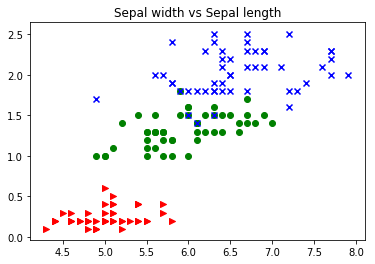

In [18]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
import numpy as np

# Cargamos la data con iris_load desde sklearn
data = load_iris()
features = data['data']
feature_names = data['feature_names']
target = data['target']

plt.title("Sepal width vs Sepal length")
for t, marker, c in zip(range(3), ">ox", "rgb"):
    # We plot each class on its own to get different colored markers
    plt.scatter(features[target == t, 0],
                features[target == t, 1],
                marker = marker,
                c = c)
plt.show()

#### Primer Modelo de Clasificacion

Si el objetivo es separar en 3 tipos de flores podemos inmediatamente hacer algunas sugerencias. Por ejemplo, ``petal length`` parece ser capaz de separar Iris Setosa de las otras dos especies de flores por su cuenta.

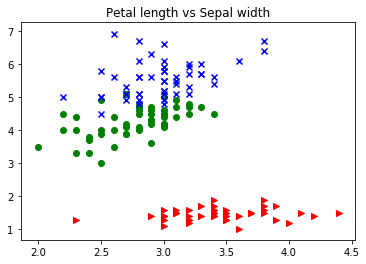

Maximum of setosa: 1.9.
Minimum of others: 3.0.


In [21]:
plength = features[:, 2] # Features(caracteristicas) de la setosa
#is_setosa = (target == 'setosa')
is_setosa = (target == 0)

# target : 
# setosa = 0
# versicolor = 1
# virginica = 2

max_setosa = plength[is_setosa].max()
min_non_setosa = plength[~is_setosa].min()

# Plotear Grafica
plt.title("Petal length vs Sepal width")
for t, marker, c in zip(range(3), ">ox", "rgb"):
    # We plot each class on its own to get different colored markers
    plt.scatter(features[target == t, 1],
                features[target == t, 2],
                marker = marker,
                c = c)
plt.show()


print('Maximum of setosa: {0}.'.format(max_setosa))
print('Minimum of others: {0}.'.format(min_non_setosa))

#### Referencias


